In [1]:
#Numpy - for scientific computing
import numpy as np
import scipy
from scipy import optimize
from scipy.optimize import curve_fit 

#For image reading and analysis
import glob
import skimage.io
import skimage.filters as sf
from skimage import io, measure, filters, transform, morphology

#Matplotlib plotting packages
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import seaborn as sns
#sns.set()

import lmfit

# For loading bars
from tqdm.notebook import tqdm as tqdm

# For creating DataFrames
import pandas as pd

In [14]:
#Import files and add the names as strings to an array
file_path = '../../analyzed_data/gliding/'
# ff1 = '2023-07-10_Gliding/'
# ff2 = '2023-07-11_Gliding/'
# ff3 = '2023-07-12_Gliding/'
# ff4 = '2023-08-11_Gliding/'
# ff5 = '2023-08-15_Gliding/'
# ff6 = '2023-08-16_Gliding/'
# ff7 = '2023-08-17_Gliding/'
# ff8 = '2023-08-18_Gliding/'
# ff9 = '2023-09-07_Gliding/'
#ff10 = '2023-10-18_Gliding/'
ff11 = '2023-10-19_Gliding/'
ff12 = '2023-10-20_Gliding/'
ff13 = '2023-10-21_Gliding/'
ff14 = '2023-10-23_Gliding/'
ff15 = '2023-10-24_Gliding/'
ff16 = '2023-10-26_Gliding/'
ff17 = '2023-10-30_Gliding/'
ff18 = '2023-10-31_Gliding/'
ff19 = '2023-11-01_Gliding/'
ff = [ff11, ff12, ff13, ff14, ff15, ff16, ff17, ff18, ff19]
included_files = '*.csv'

data_csv = []
for file_folder in ff:
    path = file_path+file_folder+included_files
    files = np.sort(glob.glob(path))
    data_csv.append(files)
data_csv = np.concatenate(data_csv)

#Convert file names to a dataframe
dfs = []
for file in data_csv:
    temp_df=pd.read_csv(file)
    #add a column of file names
    temp_df['date']=file.split('/')[-2].split('_')[0]
    temp_df['file_name']=file.split('/')[-1]
    dfs.append(temp_df)
df=pd.concat(dfs)

#reset the index and drop any extraneous columns
df=df.reset_index()
df=df.drop(columns=['Unnamed: 0', 'level_0'])

In [15]:
df

,index,area,major_axis_length,minor_axis_length,centroid-0,centroid-1,orientation,label,speed (nm/s),r^2,...,BSA_Caesin_Both,Acq_Time_s,Time_Interval_s,Cy5_exptime_ms,Cy5_gain,YFP_exptime_ms,YFP_gain,Temperature,date,file_name
0,0,13,18.647381,0.931076,45.461538,331.000000,-0.930734,2,120.185088,0.984177,...,Both,100.0,1.0,60.0,NaN,100.0,4.0,NaN,2023-10-19,0.01uM_start0_stop51.csv
1,2,31,36.107213,2.266950,161.000000,41.258065,0.135598,7,222.263636,0.993554,...,Both,100.0,1.0,60.0,NaN,100.0,4.0,NaN,2023-10-19,0.01uM_start0_stop51.csv
2,4,19,24.868389,1.865512,240.157895,45.000000,1.076441,11,154.079825,0.980140,...,Both,100.0,1.0,60.0,NaN,100.0,4.0,NaN,2023-10-19,0.01uM_start0_stop51.csv
3,5,30,42.043591,3.641550,243.066667,267.433333,0.947438,12,107.800117,0.835858,...,Both,100.0,1.0,60.0,NaN,100.0,4.0,NaN,2023-10-19,0.01uM_start0_stop51.csv
4,6,16,19.896356,1.253996,302.500000,263.312500,-0.385918,13,120.750000,0.929705,...,Both,100.0,1.0,60.0,NaN,100.0,4.0,NaN,2023-10-19,0.01uM_start0_stop51.csv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24027,72,34,39.596245,1.121827,475.500000,317.058824,-0.133760,131,136.850000,0.992420,...,Both,100.0,1.0,60.0,300.0,100.0,4.0,NaN,2023-11-01,Changing_ATP_conc--70uM_ATP--TIRF_100x_1sInter...
24028,75,19,22.359548,1.295923,486.000000,229.263158,0.201453,138,66.700000,0.980380,...,Both,100.0,1.0,60.0,300.0,100.0,4.0,NaN,2023-11-01,Changing_ATP_conc--70uM_ATP--TIRF_100x_1sInter...
24029,76,19,26.466711,1.536511,489.263158,67.947368,0.768063,141,54.912500,0.983800,...,Both,100.0,1.0,60.0,300.0,100.0,4.0,NaN,2023-11-01,Changing_ATP_conc--70uM_ATP--TIRF_100x_1sInter...
24030,77,12,19.167707,0.698507,488.583333,496.500000,-0.803723,142,82.800000,0.968364,...,Both,100.0,1.0,60.0,300.0,100.0,4.0,NaN,2023-11-01,Changing_ATP_conc--70uM_ATP--TIRF_100x_1sInter...


# Motor Concentrations

Text(0, 0.5, 'Speed (nm/s)')

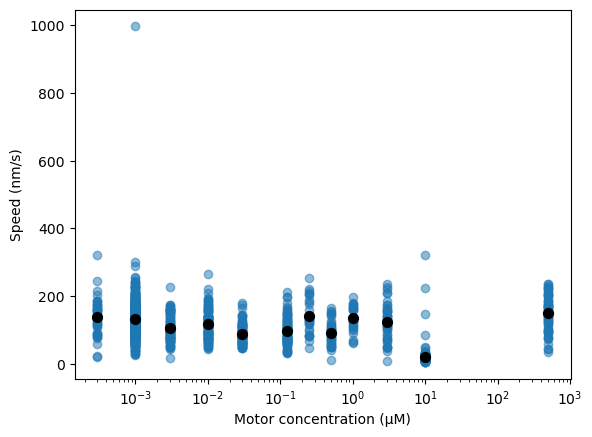

In [30]:
df_temp=df.loc[(df["ATP_Conc_uM"] == 1420)].loc[(df["ADP_Conc_uM"] == 0)].loc[(df["P_Conc_uM"] == 0)]
plt.scatter(df_temp['Motor_Conc_uM'], df_temp['speed (nm/s)'], alpha=0.5)

df_temp_mean = df_temp.groupby('Motor_Conc_uM', as_index=False).mean()
plt.scatter( df_temp_mean['Motor_Conc_uM'], df_temp_mean['speed (nm/s)'], c='k', s=50) 

plt.xscale('log')
plt.xlabel('Motor concentration (µM)')
plt.ylabel('Speed (nm/s)')

# ATP

In [31]:
#Speed ATP fit
def kcatKm_eqn(conc, kcat, Km):
    """
    Given a concentration value in uM, this function returns motor speeds in nm/s
    
    Parameters:
    conc = 1D array of ATP concentrations in uM units
    kcat = maximum hydrolysis rate at saturating ATP units 1/s
    Km = concnetration at which motors walk at half max speed in units uM
    
    Returns:
    A 1D array of motor speeds corresponding to the given concentrations
    """
    
    return (kcat*conc)/(Km +conc)



#Curve-fit to the Langmuir curve
def kcatKm_curve_fit(conc, speeds, maxconc, d, p0):
    """
    Performs a curve fitting using scipy.optimize.curve_fit to fit data
    
    Parameters
    conc = 1D array of ATP concentrations in uM units
    speeds = 1D array of measured motor speeds in 1/s units
    maxconc = maximum concentration of data taken in uM units
    p0 = 1D list with 2 entries of parameter guesses for kcat and Km
    
    Returns
    param = 1D list with fit values of each parameter (kcat and Km)
    curve = 1D array of motor speeds for every concentration value in xvals
    xvals = 1D array from 0 to maxconc with step size 1
    """
    
    
    #Curve fits and returns parameter values as well as the covarience
    param, param_cov = curve_fit(kcatKm_eqn, 
                                 conc, 
                                 speeds/d,
                                 p0, 
                                 bounds = (np.zeros(2), np.ones([2])*np.inf))

    #stores the new function information according to the coefficients given by curve-fit() function 
    xvals=np.linspace(0, int(maxconc+1), int(maxconc+1))
    curve = d*kcatKm_eqn(xvals, param[0], param[1])
    
    return param, curve, xvals

(-10.0, 400.0)

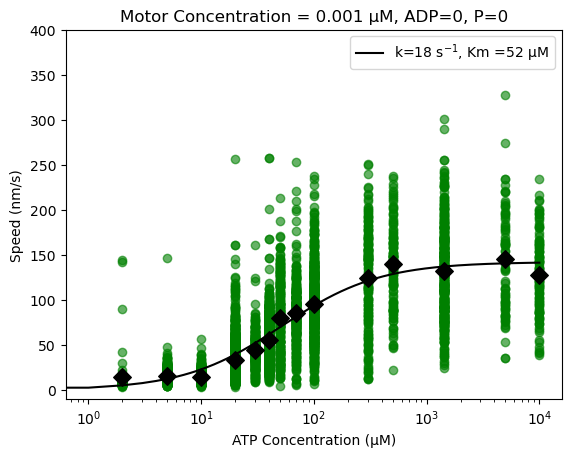

In [41]:
df_temp=df.loc[(df["Motor_Conc_uM"] == 0.001)].loc[(df["ADP_Conc_uM"]==0)].loc[(df["P_Conc_uM"] == 0)]
plt.scatter(df_temp['ATP_Conc_uM'], df_temp['speed (nm/s)'], alpha=0.6, c='g')

ATP_mean = df_temp.groupby('ATP_Conc_uM', as_index=False).mean()['ATP_Conc_uM']
ATP_mean_speed = df_temp.groupby('ATP_Conc_uM', as_index=False).mean()['speed (nm/s)']
plt.scatter( df_temp.groupby('ATP_Conc_uM').mean().reset_index()['ATP_Conc_uM'], df_temp.groupby('ATP_Conc_uM').mean().reset_index()['speed (nm/s)'], c='k', s=80, marker='D') 

param, curve, xval = kcatKm_curve_fit(ATP_mean, ATP_mean_speed, np.max(ATP_mean), 8, [100, 100])
plt.plot(xval, curve, c='k', label ='k=' + str(round(param[0])) + ' s$^{-1}$, Km =' + str(round(param[1])) +' µM')

plt.legend()
plt.xscale('log')
plt.xlabel('ATP Concentration (µM)')
plt.ylabel('Speed (nm/s)')
plt.title('Motor Concentration = 0.001 µM, ADP=0, P=0')
plt.ylim(-10,400)